<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование мобильных тарифов

В ходе исследования нам предстоит сделать предварительный анализ тарифов мобильного оператора на небольшой выборке клиентов, чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

## Изучение данных из файлов

Импортируем основные библиотеки для проведения анализа

In [1]:
import pandas as pd
import math as m
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

# Импортируем основные библиотеки

Прочитаем и выведим на экран таблицу `users`. В ней отражается общая информация о пользователях

In [2]:
users = pd.read_csv('users.csv') # Читаем файл и выводим первые пять строк на экран
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Прочитаем и выведим на экран таблицу `calls`. В ней отражается вся информация о звонках каждого пользователя

In [3]:
calls = pd.read_csv('calls.csv') # Читаем файл и выводим первые пять строк на экран
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Прочитаем и выведим на экран таблицу `messages`, где предоставлена информация о сообщениях.

In [4]:
messages = pd.read_csv('messages.csv') # Читаем файл и выводим первые пять строк на экран
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Прочитаем и выведим на экран таблицу `internet` - информация об интернет-сессиях

In [5]:
internet = pd.read_csv('internet.csv', index_col=0) # Читаем файл и выводим первые пять строк на экран
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Прочитаем и выведим на экран таблицу `tariffs`. В ней информация о тарифах

In [6]:
tariffs = pd.read_csv('tariffs.csv', index_col=0) # Читаем файл и выводим первые пять строк на экран
tariffs.head()

,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
messages_included,,,,,,,
50,15360,500,550,200,3,3,smart
1000,30720,3000,1950,150,1,1,ultra


Методом `info()` изучим общую информацию для каждого датасета

In [7]:
users.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
calls.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
messages.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
internet.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [11]:
tariffs.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 50 to 1000
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   mb_per_month_included  2 non-null      int64 
 1   minutes_included       2 non-null      int64 
 2   rub_monthly_fee        2 non-null      int64 
 3   rub_per_gb             2 non-null      int64 
 4   rub_per_message        2 non-null      int64 
 5   rub_per_minute         2 non-null      int64 
 6   tariff_name            2 non-null      object
dtypes: int64(6), object(1)
memory usage: 128.0+ bytes


### Вывод

Из полученных данных таблицы `user` можно определить, что количество уникальных пользователей действительно составляет 500 человек. По таблице `calls` и `messages` можем заметить, что количество звонков и сообщений за предоставленный период составляет 202607 и 123036 соответсвенно.
В таблице `tariffs` отражена вся необходимая информация по каждому из тарифов.

Согласно предоставленной документации, данные содержат в себе следующую информацию:

Таблица `users` (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица `calls` (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Для более детального ознакомления с датасетами необходимо провести предобработку полученных данных.

## Предобработка данных

Рассмотрим датасет `users`

In [12]:
users.head() # Выведим первые пять строк датасета

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
users.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропущенные значения в столбце `churn_date` означают, что, на момент выгрузки данных, тариф ещё действовал. Поменяем тип данных в столбцах `churn_date` и `reg_date` с **object** на **datetime64[ns]**

In [14]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') # Меняем тип данных
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') # Меняем тип данных

Удостоверимся в отсутствии дубликатов

In [15]:
users.duplicated().sum() # Поиск дубликатов

0

Проверим полученный результат

In [16]:
users.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Рассмотрим более детально датасет `calls`

In [17]:
calls.head() # Выведим первые пять строк датасета

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [18]:
calls.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений в таблице нет. Поменяем тип данных столбца `call_date` с **object** на **datetime64[ns]**.

В столбце `duration` - продолжительность звонка, встречаются нулевые значения, которые объясняются тем, что звонок был пропущен.

Согласно предоставленной документации, оператор всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Поэтому округлим значения в столбце `duration` до целых в большую сторону

In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # Меняем тип данных
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


Удостоверимся в отсутствии дубликатов

In [20]:
calls.duplicated().sum() # Поиск дубликатов

0

Проверим полученный результат

In [21]:
calls.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


In [22]:
calls # Выводим датасет на экран

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


Рассмотрим датасет, который отражает количество сообщений, отправленных пользователем

In [23]:
messages.head() # Выводим датасет на экран

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [24]:
messages.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропущенных значений в таблице нет. Поменяем тип данных столбца `message_date` с **object** на **datetime64[ns]**.

In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') # Меняем тип данных в столбце 

Удостоверимся в отсутствии дубликатов

In [26]:
messages.duplicated().sum() # Поиск дубликатов

0

Проверим полученный результат

In [27]:
messages.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Выведим на экран таблицу `internet`

In [28]:
internet.head() # Выводим датасет на экран

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [29]:
internet.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Пропущенных значений в таблице нет. Поменяем тип данных столбца `session_date` с **object** на **datetime64[ns]**.

In [30]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') # Меняем тип данных в столбце

Удостоверимся в отсутствии дубликатов

In [31]:
internet.duplicated().sum() # Поиск дубликатов

0

Проверим полученный результат

In [32]:
internet.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


Рассмотрим последнюю таблицу - `tariffs`, в которой представлена информация о тарифах

In [33]:
tariffs # Выводим датасет на экран

,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
messages_included,,,,,,,
50,15360,500,550,200,3,3,smart
1000,30720,3000,1950,150,1,1,ultra


Обновим таблицу так, чтобы столбец `messages_included` не был индексом всей таблицы

In [34]:
tariffs = tariffs.reset_index() # Обновляем индексы
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [35]:
tariffs.info() # Основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Пропущенных значений и дубликатов в таблице нет. Все типы данных соответствуют столбцам

Для каждого пользователя посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

Перед этим к таблице `calls` добивим новый столбец `tariff` для каждого пользователя.

In [36]:
calls.head() # Выводим датасет на экран

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [37]:
calls = calls.merge(users[['user_id','tariff']], on='user_id') # Объединение таблиц
calls # Выводим датасет на экран

,id,call_date,duration,user_id,tariff
0,1000_0,2018-07-25,0,1000,ultra
1,1000_1,2018-08-17,0,1000,ultra
2,1000_2,2018-06-11,3,1000,ultra
3,1000_3,2018-09-21,14,1000,ultra
4,1000_4,2018-12-15,6,1000,ultra
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,smart
202603,1499_216,2018-10-18,19,1499,smart
202604,1499_217,2018-11-10,11,1499,smart
202605,1499_218,2018-10-06,5,1499,smart


В отдельный столбец `call_month` выделим месяц каждого звонка

In [38]:
calls['month'] = calls['call_date'].dt.month # Добавление столбца 

In [39]:
calls # Выводим датасет на экран

,id,call_date,duration,user_id,tariff,month
0,1000_0,2018-07-25,0,1000,ultra,7
1,1000_1,2018-08-17,0,1000,ultra,8
2,1000_2,2018-06-11,3,1000,ultra,6
3,1000_3,2018-09-21,14,1000,ultra,9
4,1000_4,2018-12-15,6,1000,ultra,12
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,smart,12
202603,1499_216,2018-10-18,19,1499,smart,10
202604,1499_217,2018-11-10,11,1499,smart,11
202605,1499_218,2018-10-06,5,1499,smart,10


Сгруппируем данные для получения сводной таблицы, в которой столбцы `count_of_calls` и `sum_of_duration` отражают количество сделанных звонков и количество израсходованных минут за каждый месяц соответственно

In [40]:
count_of_calls_per_months = calls.groupby(['user_id', 'month','tariff'], as_index=False) \
.agg({'id':'count', 'duration':'sum'}). \
rename(columns=({'id':'count_of_calls', 'duration':'sum_of_duration'})) # Группировка данных
count_of_calls_per_months# Выводим датасет на экран

,user_id,month,tariff,count_of_calls,sum_of_duration
0,1000,5,ultra,22,159
1,1000,6,ultra,43,172
2,1000,7,ultra,47,340
3,1000,8,ultra,52,408
4,1000,9,ultra,58,466
...,...,...,...,...,...
3169,1498,10,smart,41,247
3170,1499,9,smart,9,70
3171,1499,10,smart,68,449
3172,1499,11,smart,74,612


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

Для этого в таблицу `messages` добавим дополнительный столбец, который отражает номер месяца

In [41]:
messages['month'] = messages['message_date'].dt.month # Добавление столбца
messages.head() # Выводим датасет на экран

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Сгрупируем данные для подсчёта количества отправленных сообщений по месяца

In [42]:
count_of_messages_per_months = messages.groupby(['user_id', 'month'], as_index=False).agg({'id':'count'}). \
rename(columns={'id': 'count_of_messages'}) # Группировка данных 
count_of_messages_per_months # Выводим датасет на экран

,user_id,month,count_of_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя

Для этого в таблицу `internet` добавим дополнительный столбец, который отражает номер месяца

In [43]:
internet.head() # Выводим датасет на экран

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [44]:
internet['month'] = internet['session_date'].dt.month # Добавление столбца
internet.head() # Выводим датасет на экран

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Сгрупируем данные для подсчёта объема израсходованного интернет-трафика по месяцам для каждого пользователя

In [45]:
count_of_internet_per_months = internet.groupby(['user_id', 'month'], as_index=False).agg({'mb_used':'sum'}). \
rename(columns={'mb_used': 'count_of_mb'}) # Группировка данных
count_of_internet_per_months # Выводим датасет на экран

,user_id,month,count_of_mb
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Согласно документации, для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Следовательно добавим столбец `count_of_gb` для каждого месяца

In [46]:
count_of_internet_per_months['count_of_gb'] = (count_of_internet_per_months['count_of_mb']/1024).apply(np.ceil) # Округление значения

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>

А здесь округление как раз таки верное.

In [47]:
count_of_internet_per_months # Выводим датасет на экран

,user_id,month,count_of_mb,count_of_gb
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0
...,...,...,...,...
3198,1498,10,20579.36,21.0
3199,1499,9,1845.75,2.0
3200,1499,10,17788.51,18.0
3201,1499,11,17963.31,18.0


Для того, чтобы посчитать помесячную выручку, необходимо объединить таблицы `count_of_internet_per_months`, `count_of_messages_per_months`, `count_of_calls_per_months`

In [48]:
total_data = count_of_calls_per_months.merge(count_of_messages_per_months, on=['user_id', 'month'], how='outer') \
.merge(count_of_internet_per_months, on=['user_id', 'month'], how='outer').sort_values(by='user_id').drop(columns='count_of_mb')
total_data

,user_id,month,tariff,count_of_calls,sum_of_duration,count_of_messages,count_of_gb
0,1000,5,ultra,22.0,159.0,22.0,3.0
1,1000,6,ultra,43.0,172.0,60.0,23.0
2,1000,7,ultra,47.0,340.0,75.0,14.0
3,1000,8,ultra,52.0,408.0,81.0,14.0
4,1000,9,ultra,58.0,466.0,57.0,15.0
...,...,...,...,...,...,...,...
3169,1498,10,smart,41.0,247.0,42.0,21.0
3173,1499,12,smart,69.0,492.0,66.0,13.0
3170,1499,9,smart,9.0,70.0,11.0,2.0
3171,1499,10,smart,68.0,449.0,48.0,18.0


In [49]:
from functools import reduce
data_frames = [count_of_internet_per_months, count_of_messages_per_months, count_of_calls_per_months]
reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames).sort_values(by='user_id')

,user_id,month,count_of_mb,count_of_gb,count_of_messages,tariff,count_of_calls,sum_of_duration
0,1000,5,2253.49,3.0,22.0,ultra,22.0,159.0
1,1000,6,23233.77,23.0,60.0,ultra,43.0,172.0
2,1000,7,14003.64,14.0,75.0,ultra,47.0,340.0
3,1000,8,14055.93,14.0,81.0,ultra,52.0,408.0
4,1000,9,14568.91,15.0,57.0,ultra,58.0,466.0
...,...,...,...,...,...,...,...,...
3195,1498,7,7476.24,8.0,20.0,smart,23.0,175.0
3200,1499,10,17788.51,18.0,48.0,smart,68.0,449.0
3199,1499,9,1845.75,2.0,11.0,smart,9.0,70.0
3201,1499,11,17963.31,18.0,59.0,smart,74.0,612.0


Переименуем результирующую таблицу в `total_data`

In [50]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


Создадим функцию которая будет высчитывать помесячную выручку с каждого пользователя в зависимости от тарифа

In [51]:
def payment(row): # Объявление функции 
    
    tariff = row['tariff'] # Объявление переменных
    sum_of_duration = row['sum_of_duration']
    count_of_messages = row['count_of_messages']
    count_of_gb  = row['count_of_gb']
    
    rate_for_ultra_calls = 1 # Коэффициенты добавочной стоимости для тарифа ULTRA
    rate_for_ultra_message = 1 
    rate_for_ultra_internet = 150
    
    rate_for_smart_calls = 3 # Коэффициенты добавочной стоимости для тарифа SMART
    rate_for_smart_message = 3
    rate_for_smart_internet = 200
    
    ultra_additional_payment_for_calls = 0
    ultra_additional_payment_for_message = 0
    ultra_additional_payment_for_internet = 0
    
    smart_additional_payment_for_calls = 0
    smart_additional_payment_for_message = 0
    smart_additional_payment_for_internet = 0
    
    if tariff == 'ultra': # Условие к какому тарифу принадлежит пользователь
        
        if sum_of_duration > tariffs.loc[1,'minutes_included']:
            ultra_additional_payment_for_calls = (sum_of_duration - tariffs.loc[1,'minutes_included'])*rate_for_ultra_calls

        if count_of_messages > tariffs.loc[1,'messages_included']:
            ultra_additional_payment_for_message = (count_of_messages - tariffs.loc[1,'messages_included'])*rate_for_ultra_message
        
        if count_of_gb > tariffs.loc[1,'gb_per_month_included']:
            ultra_additional_payment_for_internet = (count_of_gb - tariffs.loc[1,'gb_per_month_included'])*rate_for_ultra_internet
            
        # Условия суммирования дополнительной платы к абонентской
    
        if sum_of_duration <= tariffs.loc[1,'minutes_included'] and count_of_messages <= tariffs.loc[1,'messages_included'] and count_of_gb <= tariffs.loc[1,'gb_per_month_included']:
            return tariffs.loc[1,'rub_monthly_fee']  
        else:
            return (tariffs.loc[1,'rub_monthly_fee'] + ultra_additional_payment_for_calls + ultra_additional_payment_for_message + ultra_additional_payment_for_internet)
        
    if tariff == 'smart': # Условие к какому тарифу принадлежит пользователь
        
        if  sum_of_duration > tariffs.loc[0,'minutes_included']:
            smart_additional_payment_for_calls = (sum_of_duration-tariffs.loc[0,'minutes_included'])*rate_for_smart_calls

        if count_of_messages > tariffs.loc[0,'messages_included']:
            smart_additional_payment_for_message = (count_of_messages - tariffs.loc[0,'messages_included'])*rate_for_smart_message
        
        if count_of_gb > tariffs.loc[0,'gb_per_month_included']:
            smart_additional_payment_for_internet = (count_of_gb - tariffs.loc[0,'gb_per_month_included'])*rate_for_smart_internet  
            
         # Условия суммирования дополнительной платы к абонентской
        
        if sum_of_duration <= tariffs.loc[0,'minutes_included'] and count_of_messages <= tariffs.loc[0,'messages_included'] and count_of_gb <= tariffs.loc[0,'gb_per_month_included']:
            return tariffs.loc[0,'rub_monthly_fee']
        else:
            return (tariffs.loc[0,'rub_monthly_fee'] + smart_additional_payment_for_calls + smart_additional_payment_for_message + smart_additional_payment_for_internet)
    

total_data['payment_for_month'] = total_data.apply(payment, axis=1) # Применение метода apply ко всем строкам датасета

Выведим на экран итоговую таблицу

In [52]:
total_data # Вывод таблица на экран

,user_id,month,tariff,count_of_calls,sum_of_duration,count_of_messages,count_of_gb,payment_for_month
0,1000,5,ultra,22.0,159.0,22.0,3.0,1950.0
1,1000,6,ultra,43.0,172.0,60.0,23.0,1950.0
2,1000,7,ultra,47.0,340.0,75.0,14.0,1950.0
3,1000,8,ultra,52.0,408.0,81.0,14.0,1950.0
4,1000,9,ultra,58.0,466.0,57.0,15.0,1950.0
...,...,...,...,...,...,...,...,...
3169,1498,10,smart,41.0,247.0,42.0,21.0,1750.0
3173,1499,12,smart,69.0,492.0,66.0,13.0,598.0
3170,1499,9,smart,9.0,70.0,11.0,2.0,550.0
3171,1499,10,smart,68.0,449.0,48.0,18.0,1150.0


### Вывод

В ходе предобработки данных во всех таблицах были заменены типы данных в столбцах, которые отображают дату. 

Были проанализированны пропуски в столбце `churn_date` (датасет`users`) и `duration` (датасет `calls`).

По итогу, было создана отдельная обобщающая таблица, которая для каждого пользователя по каждому месяцу включает в себя следующие параметры:

- **tariff** - тип тарифа для пользователя
- **count_of_calls** - количество звонков
- **sum_of_duration** - количество израсходованных минут
- **count_of_messages** - количество сообщений
- **count_of_gb** - количество потраченных Гб
- **payment_for_month** - итоговый столбец, который отражает помесячную выручку с каждого пользователя


## Исследовательский анализ данных

Для сравнительного анализа тарифов `smart` и `ultra` разобьём обобщающий датасет `total_data` на пользователей, которые используют эти два тарифа

In [53]:
data_smart = total_data[total_data['tariff'] == 'smart'] # Логическая индексация 
data_ultra = total_data[total_data['tariff'] == 'ultra']

Выведим полученный результат на экран

In [54]:
data_smart # Выведим датасет на экран

,user_id,month,tariff,count_of_calls,sum_of_duration,count_of_messages,count_of_gb,payment_for_month
9,1001,12,smart,63.0,414.0,NaN,14.0,550.0
8,1001,11,smart,59.0,430.0,NaN,18.0,1150.0
10,1002,6,smart,15.0,117.0,4.0,11.0,550.0
11,1002,7,smart,26.0,214.0,11.0,18.0,1150.0
12,1002,8,smart,42.0,289.0,13.0,20.0,1550.0
...,...,...,...,...,...,...,...,...
3169,1498,10,smart,41.0,247.0,42.0,21.0,1750.0
3173,1499,12,smart,69.0,492.0,66.0,13.0,598.0
3170,1499,9,smart,9.0,70.0,11.0,2.0,550.0
3171,1499,10,smart,68.0,449.0,48.0,18.0,1150.0


In [55]:
data_ultra # Выведим датасет на экран

,user_id,month,tariff,count_of_calls,sum_of_duration,count_of_messages,count_of_gb,payment_for_month
0,1000,5,ultra,22.0,159.0,22.0,3.0,1950.0
1,1000,6,ultra,43.0,172.0,60.0,23.0,1950.0
2,1000,7,ultra,47.0,340.0,75.0,14.0,1950.0
3,1000,8,ultra,52.0,408.0,81.0,14.0,1950.0
4,1000,9,ultra,58.0,466.0,57.0,15.0,1950.0
...,...,...,...,...,...,...,...,...
3146,1495,8,ultra,17.0,92.0,13.0,3.0,1950.0
3147,1495,9,ultra,112.0,813.0,82.0,33.0,2400.0
3148,1495,10,ultra,152.0,1030.0,82.0,29.0,1950.0
3149,1495,11,ultra,129.0,954.0,79.0,39.0,3300.0


Примем во внимание тот факт, что пользователей с тарифом `smart` примерно в 2.3 раза больше, чем пользователей тарифа `Ultra` 

Для каждого тарифа посчитаем среднее количество минут разговора и построим гистограмму

In [56]:
data_smart['sum_of_duration'].describe() # Описание основных характеристик столбца

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: sum_of_duration, dtype: float64

In [57]:
data_ultra['sum_of_duration'].describe() # Описание основных характеристик столбца

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: sum_of_duration, dtype: float64

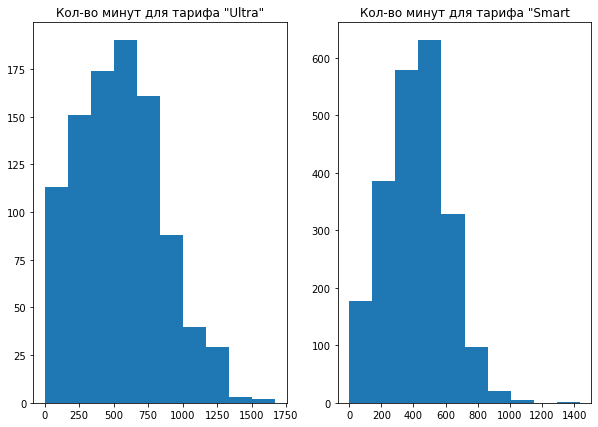

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10,7)) # Построение гистограмм
axs[0].hist(data_ultra['sum_of_duration'])
axs[0].set_title('Кол-во минут для тарифа "Ultra"')
axs[1].hist(data_smart['sum_of_duration'])
axs[1].set_title('Кол-во минут для тарифа "Smart');

Можем заметить, что количество израсходованных минут у пользователей, которые пользуются тарифом `ultra` **больше** чем у пользователей, которые предпочитают тариф `smart`

Для каждого тарифа посчитаем среднее количество сообщений и построим гистограмму

In [59]:
data_smart['count_of_messages'].describe() # Описание основных характеристик столбца

count    1916.000000
mean       38.747390
std        26.817396
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: count_of_messages, dtype: float64

In [60]:
data_ultra['count_of_messages'].describe() # Описание основных характеристик столбца

count    762.000000
mean      61.195538
std       44.716597
min        1.000000
25%       25.000000
50%       52.000000
75%       88.000000
max      224.000000
Name: count_of_messages, dtype: float64

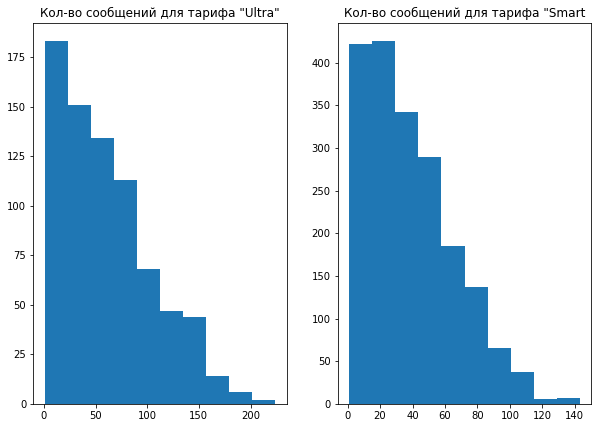

In [61]:
fig_1, axs_1 = plt.subplots(1, 2, figsize=(10,7)) # Построение гистограмм
axs_1[0].hist(data_ultra['count_of_messages'])
axs_1[0].set_title('Кол-во сообщений для тарифа "Ultra"')
axs_1[1].hist(data_smart['count_of_messages'])
axs_1[1].set_title('Кол-во сообщений для тарифа "Smart');

Таким образом, среднее количество сообщений у тарифа `Ultra` больше, чем у тарифа `Smart`

Для каждого тарифа посчитаем среднее количество использованного трафика и построим гистограммы распределения

In [62]:
data_smart['count_of_gb'].describe() # Описание основных характеристик столбца

count    2222.000000
mean       16.337084
std         5.743447
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: count_of_gb, dtype: float64

In [63]:
data_ultra['count_of_gb'].describe() # Описание основных характеристик столбца

count    941.000000
mean      19.695005
std        9.735407
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: count_of_gb, dtype: float64

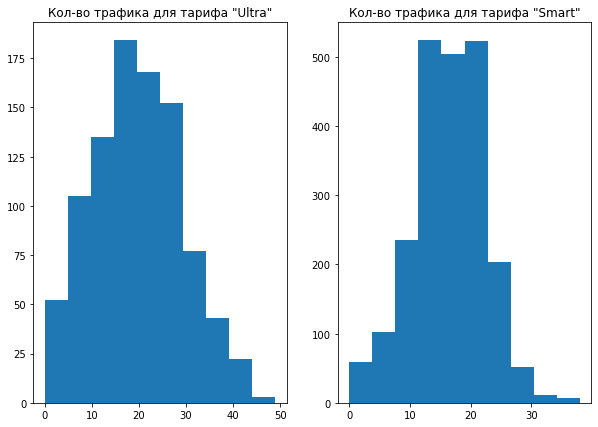

In [64]:
fig_2, axs_2 = plt.subplots(1, 2, figsize=(10,7)) # Построение гистограмм
axs_2[0].hist(data_ultra['count_of_gb'])
axs_2[0].set_title('Кол-во трафика для тарифа "Ultra"')
axs_2[1].hist(data_smart['count_of_gb'])
axs_2[1].set_title('Кол-во трафика для тарифа "Smart"');

Так же можем заметить, что среднее количесто потраченного трафика у тарифа `Ultra` составляет 19.69 Гб, а у тарифа `Smart` - 16.33 Гб

Рассмотрим среднее значение выручки по каждому из тарифов

In [65]:
data_smart['payment_for_month'].describe() # Описание основных характеристик столбца

count    2223.000000
mean     1290.891138
std       819.119853
min       550.000000
25%       550.000000
50%      1030.000000
75%      1750.000000
max      6770.000000
Name: payment_for_month, dtype: float64

In [66]:
data_ultra['payment_for_month'].describe() # Описание основных характеристик столбца

count     951.000000
mean     2070.977918
std       379.423372
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: payment_for_month, dtype: float64

Заметим, что средняя выручка у тарифа `Ultra` больше, чем у тарифа `Smart`

### Вывод

В ходе исследования было установлено, что все рассматриваемые параметры, а именно `среднее количество израсходованных минут`, `среднее количество сообщений` и `среднее количество потраченного трафика`, `средняя выручка` у тарифа `Ultra` выше, чем у тарифа `Smart`.

Для ответа на главный вопрос исследования "какой тариф приносит больше денег?" обратимся к проверке гипотез.

## Проверка гипотез

Проверим двустороннюю гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Нулева гипотеза будет звучать следующим образом:

H0: Предположим, что средняя выручка пользователей тарифов "Ультра" и "Смарт" **равна**

Альтернативная гипотеза, в свою очередь, звучит так:

H1 : Средняя выручка пользователей тарифов "Ультра" и "Смарт" **различается**

Для сравнения двух выборок будем использовать t-тест.

Удостоверимся, что все три аспекта удовлетворяют условиям проведения  t-теста:

- [x]  Генеральные совокупности не должны зависеть друг от друга. Генеральные совокупности независимы друг от друга
- [x] Выборочные средние должны быть нормально распределены. Благодрая ЦПТ, утверждение верно
- [x] Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, такой подход оправдан

In [67]:
ultra_sample = data_ultra['payment_for_month'] 
smart_sample  = data_smart['payment_for_month']

alpha = 0.05 # Уровень значимости

results = st.ttest_ind(ultra_sample, smart_sample) # Проведение t-теста

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # Cравнение результата с уровнем значимости 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.1830308249112928e-155
Отвергаем нулевую гипотезу


Получили `p-value` сильно меньше порогового уровня значимости `alpha`, следовательно отклоняем нулевую гипотезу о том, что средняя выручка пользователей тарифов "Ультра" и "Смарт" равна.

Проверим двустороннюю гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки из друхи регионов.

Добавим столбец с названием регионов в обобщающую таблицу `total_data`

In [68]:
total_data = total_data.merge(users[['user_id', 'city']], on='user_id') # Объединение таблиц
total_data.head()

,user_id,month,tariff,count_of_calls,sum_of_duration,count_of_messages,count_of_gb,payment_for_month,city
0,1000,5,ultra,22.0,159.0,22.0,3.0,1950.0,Краснодар
1,1000,6,ultra,43.0,172.0,60.0,23.0,1950.0,Краснодар
2,1000,7,ultra,47.0,340.0,75.0,14.0,1950.0,Краснодар
3,1000,8,ultra,52.0,408.0,81.0,14.0,1950.0,Краснодар
4,1000,9,ultra,58.0,466.0,57.0,15.0,1950.0,Краснодар


Проведём выборочное изменение данных, оставим пользователей из города Москва без изменений, а все остальные населённые пункты заменим на "Другие регионы"

In [69]:
total_data['city'] = total_data['city'].where(total_data['city'] == 'Москва', 'Другие регионы')
# Выборочная замена данных

Проверим получившийся результат

In [70]:
total_data['city'].value_counts() # Подсчёт уникальных значений в столбце

Другие регионы    2603
Москва             611
Name: city, dtype: int64

Итак, сформулируем гипотезы:

H0: Cредняя выручка пользователей из Москвы **равна** выручке пользователей из других регионов

H1: Cредняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

Для сравнения двух выборок будем использовать t-тест.

In [73]:
moscow_sample = total_data[total_data['city'] == 'Москва']['payment_for_month'].dropna()
another_sample = total_data[total_data['city'] == 'Другие регионы']['payment_for_month'].dropna()

alpha = 0.05 # Уровень значимости

results = st.ttest_ind(moscow_sample, another_sample) # Проведение t-теста

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4619932225305272
Не получилось отвергнуть нулевую гипотезу


В результате проверки гипотезы получили значение p-value значительно больше, чем пороговый уровень значимости, таким образом не имеем статистически значимых оснований отклонить нулевую гипотезу

### Вывод

В ходе исследования были проверены две гипотезы:

- Cредняя выручка пользователей тарифов "Ультра" и "Смарт" равна. Получили статистически значимый результат и отклонили нулевую гипотезу
- Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Не получили статистически значимого результат, нулевую гипотезу отвергнуть не получилось

## Общий вывод

При выполнении проекта были проделаны следующие шаги:

- Получение основной информации о предоставленных данных
- Предобработка, которая включала в себя приведение данных у нужному типу, проанализированы пропущенные значения в некоторых столбцах, сделаны выводы.
- Для каждого пользователя были посчитаны количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячную выручку с каждого пользователя
- Проведён исследовательский анализ данных, в котором были посчитаны основные статистические характеристики для пользователей разных тарифов, проведен сравнительный анализ этих характеристик, построены гистограммы, сделаны выводы
- Проверены статистические гипотезы о равенстве среднее выручке пользователей тарифов и пользователей из Москвы по отношению к пользователям других регионов. В первом случае мы отклонили нулевую гипотезу, во второй оснований для отклонения гипотезы было недостаточно.

Исходя из результатов проведенного исследования можно сделать вывод о том, что тариф `Ultra` смотрится лучше и выгоднее с коммерческой точки зрения, чем тариф `Smart`